Accuracy sur le jeu test : 0.9015


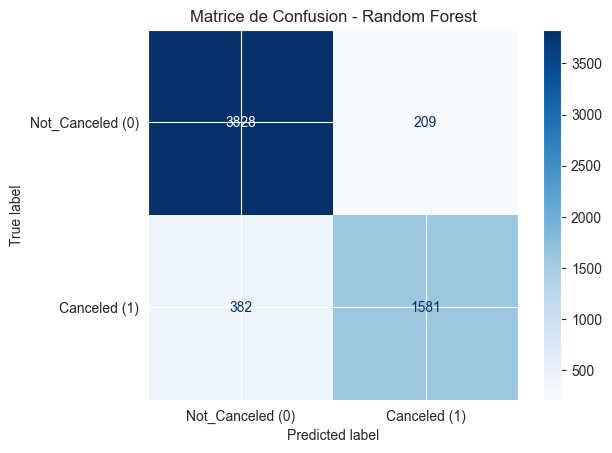

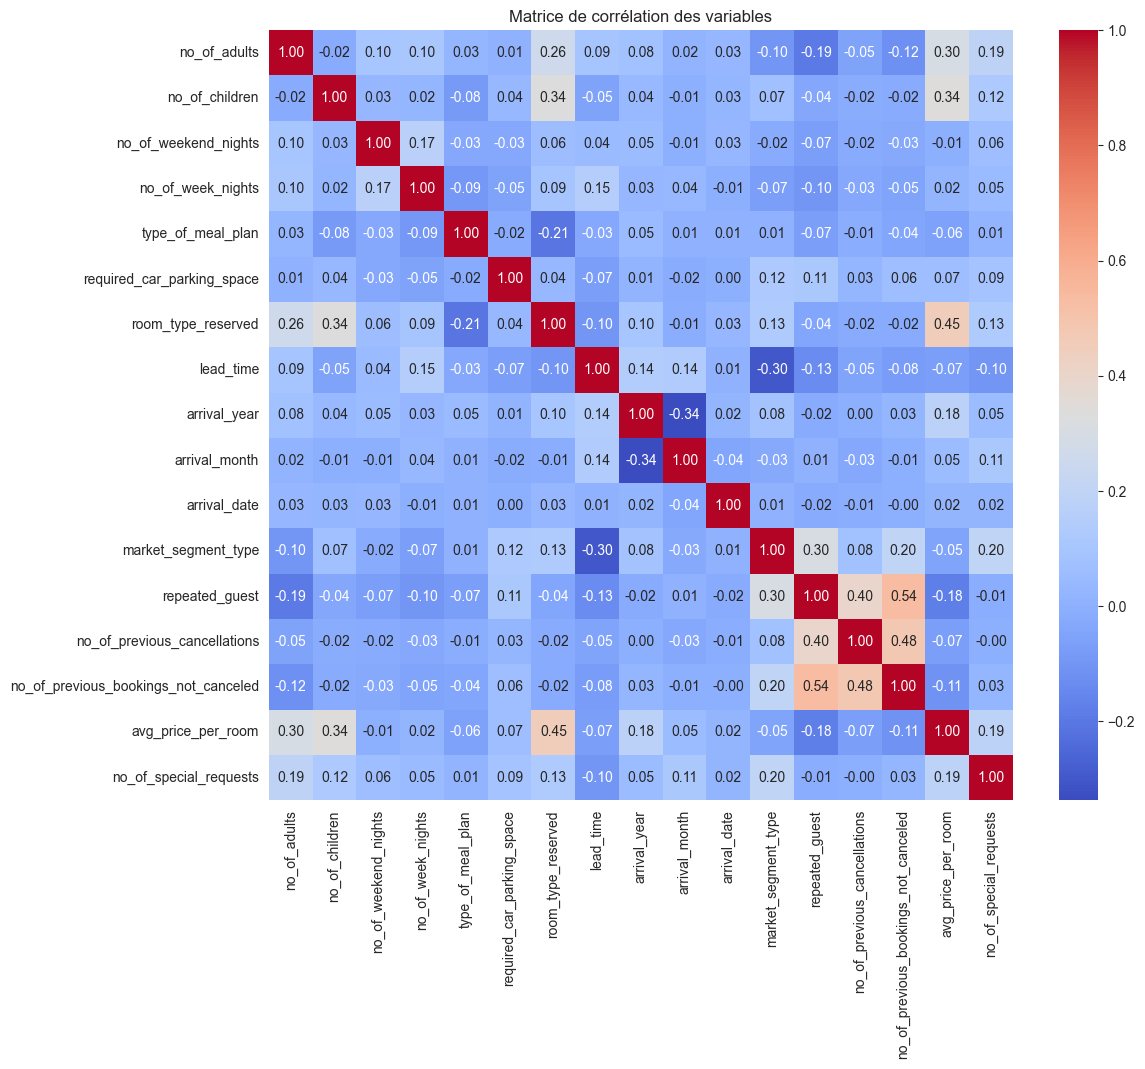

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import normalize

import os
os.environ['OMP_NUM_THREADS'] = '4'

# Chargement des données
data = pd.read_csv("Hotel Reservations.txt")

# Préparation des features (X)
X = data.drop(['Booking_ID', 'booking_status'], axis=1)

# Encodage des variables catégorielles
X['type_of_meal_plan'] = X['type_of_meal_plan'].map({
    'Meal Plan 1': 0,
    'Meal Plan 2': 1,
    'Not Selected': 2
}).fillna(2).astype(int)

X['room_type_reserved'] = X['room_type_reserved'].map({
    'Room_Type 1': 0,
    'Room_Type 2': 1,
    'Room_Type 3': 2,
    'Room_Type 4': 3,
    'Room_Type 5': 4,
    'Room_Type 6': 5
}).fillna(-1).astype(int)

X['market_segment_type'] = X['market_segment_type'].map({
    'Offline': 0,
    'Online': 1,
    'Corporate': 2,
    'Aviation': 3,
    'Complementary': 4
}).fillna(-1).astype(int)

# Préparation de la cible (y)
y = data['booking_status'].map({
    'Not_Canceled': 0,
    'Canceled': 1
}).astype(int)

# Séparation train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisation des données (important pour certains modèles)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle Random Forest supervisé
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Prédictions sur le test
y_pred = rf.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le jeu test : {acc:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not_Canceled (0)', 'Canceled (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion - Random Forest")
plt.show()

# Matrice de corrélation (features numériques seulement)
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables")
plt.show()


On va afficher des graphiques pour bien visualiser

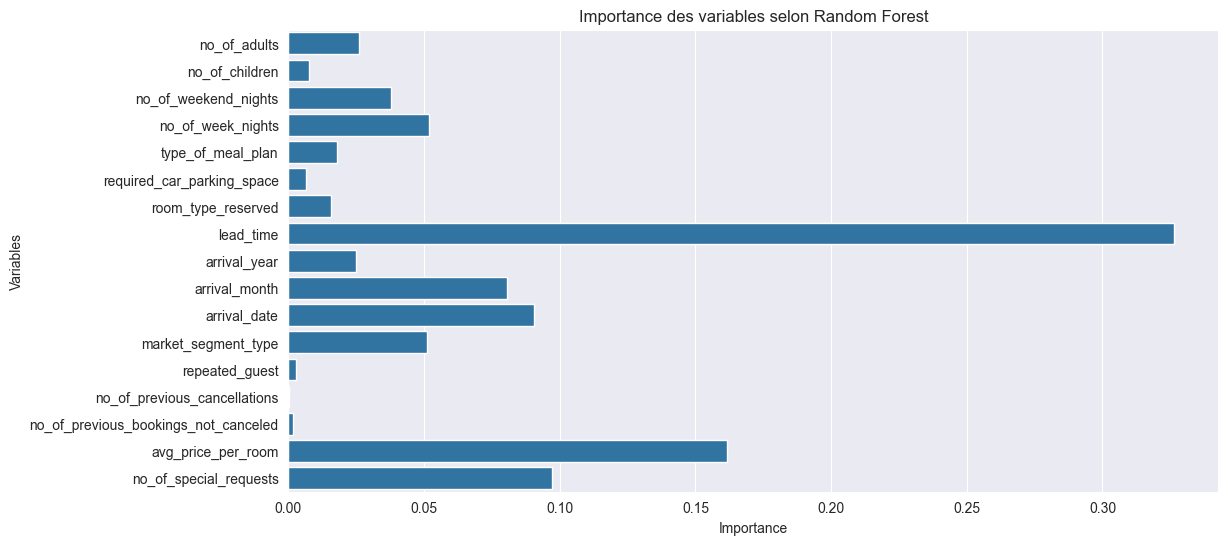

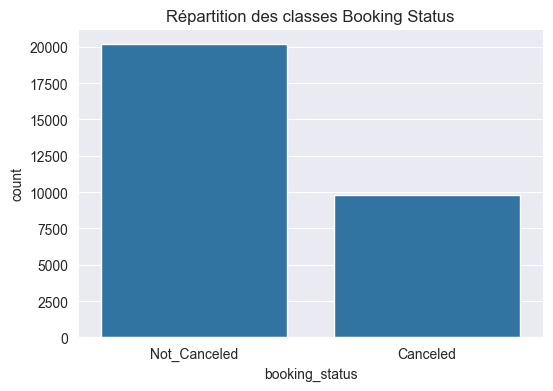

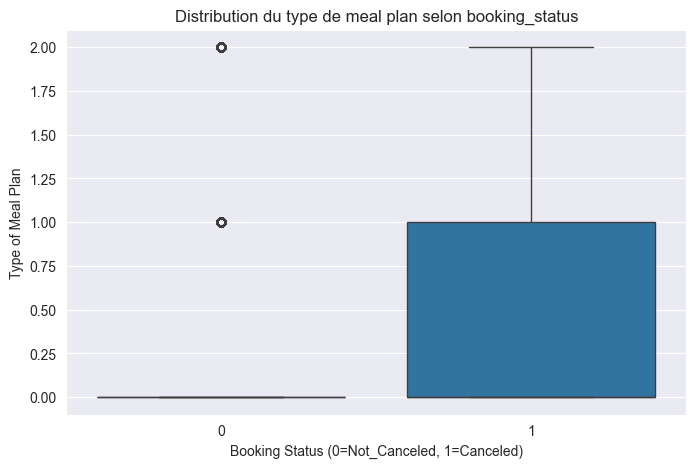

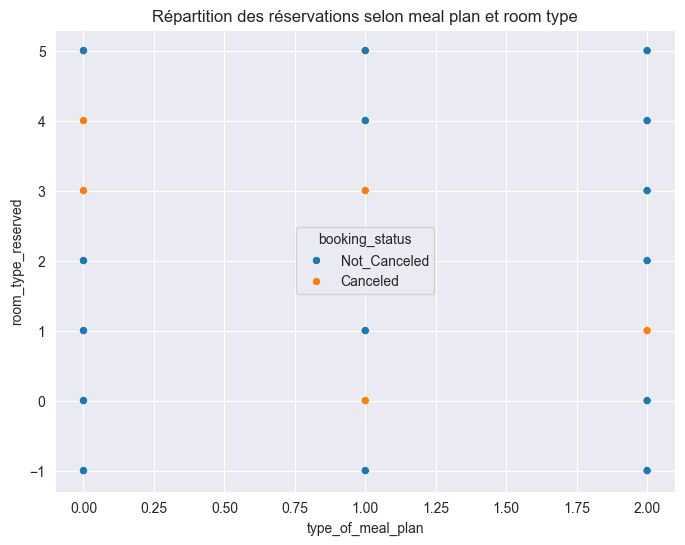

In [29]:
importances = rf.feature_importances_
features = X.columns

# Graphique des importances des variables
plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=features)
plt.title("Importance des variables selon Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.show()

# Distribution des classes dans y (status de réservation)
plt.figure(figsize=(6,4))
sns.countplot(x=y.map({0:'Not_Canceled',1:'Canceled'}))
plt.title("Répartition des classes Booking Status")
plt.show()

# Visualisation de certaines variables selon la classe cible (exemple avec 'type_of_meal_plan')
plt.figure(figsize=(8,5))
sns.boxplot(x=y, y=X['type_of_meal_plan'])
plt.title("Distribution du type de meal plan selon booking_status")
plt.xlabel("Booking Status (0=Not_Canceled, 1=Canceled)")
plt.ylabel("Type of Meal Plan")
plt.show()

# Nuage de points avec deux features pour voir la séparation (exemple avec 'type_of_meal_plan' et 'room_type_reserved')
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['type_of_meal_plan'], y=X['room_type_reserved'], hue=y.map({0:'Not_Canceled',1:'Canceled'}))
plt.title("Répartition des réservations selon meal plan et room type")
plt.show()


Maintenant que notre modèle a été entraîné, on va lui passer notre jeu de données test et sauver les résultats

In [30]:

X_test = pd.read_csv("Donnees_test.csv")
# ... mêmes mappings pour meal plan, room type, market segment ...

X_test = data.drop(['Booking_ID', 'booking_status'], axis=1)

# 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type'
classes_Meal_Plan = X_test['type_of_meal_plan'].map({
    'Meal Plan 1': 0,
    'Meal Plan 2': 1,
    'Not Selected' : 2
}).fillna(2).astype(int)

classes_Room_Type = X_test['room_type_reserved'].map({
    'Room_Type 1': 0,
    'Room_Type 2': 1,
    'Room_Type 3': 2,
    'Room_Type 4': 3,
    'Room_Type 5': 4,
    'Room_Type 6': 5
}).fillna(-1).astype(int)  # ou .dropna() si tu veux exclure les valeurs inattendues

classes_Market_Segment = X_test['market_segment_type'].map({
    'Offline': 0,
    'Online': 1,
    'Corporate': 2,
    'Aviation': 3,
    'Complementary': 4
}).fillna(-1).astype(int)  # pour gérer les valeurs manquantes ou inattendues

X_test['type_of_meal_plan'] = classes_Meal_Plan
X_test['room_type_reserved'] = classes_Room_Type
X_test['market_segment_type'] = classes_Market_Segment

X_test = normalize(X_test, norm='l2')  # Chaque ligne a une norme L2 = 1

clusters_test = rf.predict(X_test)

# Comme expliqué, il faut voir quel cluster correspond à quelle classe.
# Supposons ici que cluster 0 = Not Canceled, cluster 1 = Canceled.
# Tu peux inverser si besoin (test en fonction de tes données).
labels_map = {0: "Not Canceled", 1: "Canceled"}

results = [labels_map[c] for c in clusters_test]

df_results = pd.DataFrame(results)

df_results.to_csv("GUERRAULT_Yonni.csv", index=False, header=False)

print("Fichier créé")



Fichier créé
